# 需求（和20210717中类似）
## 1、统计人数
截止到2021年7月17日晚上20:30左右，当天有学生XX人次、XX名教师、XX名校长完成了测试；累计共有学生XX人次、XX名教师、XX名校长完成了测试。
## 2、作答时间
智能计算素养和问题解决素养两个专题的规定测试时间均为60分钟，截止目前完成测试学生实际作答的平均时间为XX分钟。

（一）智能计算素养专题

智能计算素养专题的题目在预测试中作答时长均值为40-50分钟，少数同学的作答时长在30分钟以下和1小时以上。7月17日当天，绵阳地区有XX名学生的实际作答时长小于等于10分钟，XX名学生的实际作答时长小于等于20分钟；XX名学生的实际作答时长小于等于30分钟。总体作答时长分布如下图：

【一个7月17日当天学生完成作答智能计算素养专题的时长分布饼状图，时长单位为分钟，每10分钟一块就可以，每一块上标注上所占比例，超过60分钟的就一块“60分钟及以上”】
截止到7月17日20:30左右，累计共有XX名学生的实际作答时长小于等于10分钟，XX名学生的实际作答时长小于等于20分钟；XX名学生的实际作答时长小于等于30分钟。总体作答时长分布如下图：

【一个累计学生完成作答智能计算素养专题的时长分布饼状图，时长单位为分钟，每10分钟一块就可以，每一块上标注上所占比例，超过60分钟的就一块“60分钟及以上”】

（二）问题解决素养专题

问题解决素养专题的题目在预测试中33%的学生作答时间超过45分钟，23%的学生超过50分钟，9%的学生超过60分钟，大部分学生都需要50分钟才能完成测试。7月17日当天，绵阳地区有XX名学生的实际作答时长小于等于10分钟，XX名学生的实际作答时长小于等于20分钟；XX名学生的实际作答时长小于等于30分钟。总体作答时长分布如下图：

【一个7月17日当天学生完成作答问题解决专题的时长分布饼状图，时长单位为分钟，每10分钟一块就可以，每一块上标注上所占比例，超过60分钟的就一块“60分钟及以上”】

截止到7月17日20:30左右，累计共有XX名学生的实际作答时长小于等于10分钟，XX名学生的实际作答时长小于等于20分钟；XX名学生的实际作答时长小于等于30分钟。总体作答时长分布如下图：

【一个累计学生完成作答问题解决素养专题的时长分布饼状图，时长单位为分钟，每10分钟一块就可以，每一块上标注上所占比例，超过60分钟的就一块“60分钟及以上”】

## 3、作答学校分布
7月17日当天，作答时长小于等于10分钟的学生所在学校（大于10人）：

学校名称  ｜  人数


累计到7月17日20:30左右，作答时长小于等于10分钟的学生所在学校（大于50人）：

学校名称  ｜  人数
## 4、输出EXCEL文件
添加一列做题时长

# 首先引入第三方库

In [ ]:
import pandas as pd
import json 
import numpy as np
import ast
from datetime import datetime
import plotly.graph_objs as go
from plotly.offline import plot
import plotly.offline as offline
import plotly.figure_factory as ff
from pandas.core.indexes import interval
import re

# 提前定义每一行的计算时间函数

In [ ]:
# 2021-07-16T19:31:13+08:00
def get_interval_per_row(index, df):
    row_data = df.loc[index,:]
    start_time = row_data['start_time']
    if start_time != start_time:
        return -1
    start_time = datetime.strptime(str(start_time),"%Y-%m-%dT%H:%M:%S+08:00")

    expire_time = row_data['expire_time']
    if expire_time != expire_time:
        return -1
    expire_time = datetime.strptime(str(expire_time),"%Y-%m-%dT%H:%M:%S+08:00")

    stop_time = row_data['stop_time']
    if stop_time != stop_time:
        return -1
    stop_time = datetime.strptime(str(stop_time),"%Y-%m-%dT%H:%M:%S+08:00")

    total_minu = (stop_time - start_time).seconds / 60.0
    return total_minu

# 提前定义转码task_answers字段的函数

In [97]:
def remove_str_per_row(data_per_row):
    frame_list = ast.literal_eval(data_per_row)
    frame_dic_list = []
    for index in range(len(frame_list)):
        temp = json.loads(frame_list[index])
        if 'frame' in temp.keys():
            if 'data' in temp.keys():
                frame_dic_list.append(list(temp['frame']['data'].values())) 
            else:
                frame_dic_list.append(list(temp['frame'].values())) 
        else:
            frame_dic_list.append(temp) 
    return frame_dic_list

# 读取数据

In [98]:
df_main = pd.read_csv('./data/data.csv')  


# 测试函数运行是否正常

In [99]:
dic_list_test = remove_str_per_row(df_main.loc[1, 'task_answers'])
dic_list_test, len(dic_list_test)
time_test_minu = get_interval_per_row(0, df_main)
time_test_minu

-1

# 增加做题时间属性（'interval'）

In [100]:
time_minu_list = []
drop_index_list = []
for row in range(len(df_main)):
    interval_minu = get_interval_per_row(row, df_main)
    if interval_minu == -1:
        drop_index_list.append(row)
    else:
        time_minu_list.append(interval_minu)

In [101]:
len(df_main)

36639

In [102]:
len(drop_index_list)

3185

In [103]:
len(time_minu_list)

33454

In [104]:
df_main = df_main.drop(drop_index_list)
if 'interval_minutes' not in df_main.columns:
    df_main.insert(len(df_main.columns), 'interval_minutes', time_minu_list)

# 数据针对试卷分类

In [105]:
grouped_main = df_main.groupby('contest_id')
df_contest_list = [tup[1] for tup in list(grouped_main)]
df_contest_name_list = [tup[0] for tup in list(grouped_main)]

In [106]:
df_contest_name_list

['mianyang/智能计算素养', 'mianyang/问题解决素养', 'mianyang/高中教师问卷', 'mianyang/高中校长问卷']

# 分类结果
智能计算和问题解决分别在列表中的index=1和index=2

In [107]:
df_res_1 = df_contest_list[0] # 智能计算
df_res_2 = df_contest_list[1] # 问题解决

In [108]:
grouped_main['interval_minutes'].mean()

contest_id
mianyang/智能计算素养    39.263189
mianyang/问题解决素养    30.057153
mianyang/高中教师问卷    20.316314
mianyang/高中校长问卷    32.817778
Name: interval_minutes, dtype: float64

# 教师和校长数量

In [109]:
len(df_contest_list[2]), len(df_contest_list[3])

(615, 15)

# 智能计算学生数量

In [110]:
x1_sum = len(df_contest_list[0])
x1_sum

15811

# 问题解决学生数量

In [111]:
x2_sum = len(df_contest_list[1])
x2_sum

17013

# 学生总数

In [112]:
x1_sum + x2_sum

32824

# 再将教师和校长的数据剔除

In [113]:
[tup[0] for tup in list(df_res_1.groupby('tag'))]

['我是学生,高中生问卷一,高中生问卷二,高中生问卷三,高中生问卷四,高中生问卷五,建模素养,智能计算素养,问题解决素养,人文素养']

In [114]:
[tup[0] for tup in list(df_res_2.groupby('tag'))]

['我是学生,高中生问卷一,高中生问卷二,高中生问卷三,高中生问卷四,高中生问卷五,建模素养,智能计算素养,问题解决素养,人文素养']

# 提取最终画图用到的dataframe

In [115]:
df_res_1.columns

Index(['user', 'type', 'contest_id', 'ticket_id', 'start_time', 'expire_time',
       'stop_time', 'mobile_alert', 'task_answers', 'user_agent', 'client_ip',
       'school', 'tag', 'name', 'owner', 'state', 'is_parent',
       'interval_minutes'],
      dtype='object')

In [116]:
x1 = []
x2 = []

for row in range(len(df_res_1)):
    interval = df_res_1.iloc[row, 17]
    if interval != -1:
        x1.append(interval)

for row in range(len(df_res_2)):
    interval = df_res_2.iloc[row, 17]
    if interval != -1:
        x2.append(interval)

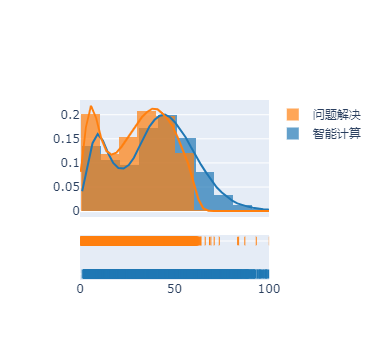

In [117]:
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

layout={"title": "学生用时分布", 
                                       "xaxis_title": "学生用时，单位秒",
                                       "yaxis_title": "学生个数",
                                       # x轴坐标倾斜60度
                                       "xaxis": {"tickangle": 60}
                                      }

#数据组
hist_data=[x1,x2]

group_labels=['智能计算','问题解决']

fig=ff.create_distplot(hist_data,group_labels,bin_size=10,histnorm = 'probability')
fig['layout'].update(xaxis = dict(range = [0,100]))
plot(fig,filename='./plot/总计时间分布直方图.html')
offline.iplot(fig) 

In [118]:
x1_ary, _ = np.histogram(x1, bins=[0,10,20,30,40,50,60])
x1_list = list(x1_ary)
x1_list.append(x1_sum - x1_ary.sum())
x1_list

[1834, 1866, 1413, 2625, 3177, 2521, 2375]

In [119]:
x2_ary, _ = np.histogram(x2, bins=[0,10,20,30,40,50,60])
x2_list = list(x2_ary)
x2_list.append(x2_sum - x2_ary.sum())
x2_list

[3329, 2023, 2553, 3497, 3376, 2160, 75]

In [120]:
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]
colors[0:7]
import plotly
plotly.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

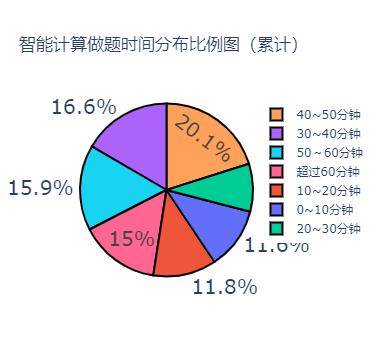

In [135]:

import plotly as py
import plotly.graph_objs as go
pyplt=py.offline.plot
labels=['0~10分钟','10~20分钟','20~30分钟','30~40分钟','40~50分钟', '50～60分钟', '超过60分钟']
values=x1_list
trace=[go.Pie(labels=labels,values=values)]
layout=go.Layout(
    title='智能计算做题时间分布比例图（累计）'
)
fig=go.Figure(data=trace,layout=layout)
fig.update_traces(hoverinfo='label+percent',
#  textinfo='value', 
 textfont_size=20, marker=dict(colors=plotly.colors.qualitative.Plotly[0:7], line=dict(color='#000000', width=2)))
pyplt(fig,filename='plot/总计智能计算时间分布饼图.html')
offline.iplot(fig) 

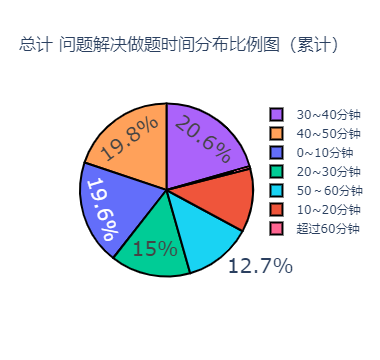

In [136]:
import plotly as py
import plotly.graph_objs as go
pyplt=py.offline.plot
labels=['0~10分钟','10~20分钟','20~30分钟','30~40分钟','40~50分钟', '50～60分钟', '超过60分钟']
values=x2_list
trace=[go.Pie(labels=labels,values=values)]
layout=go.Layout(
    title='总计 问题解决做题时间分布比例图（累计）'
)
fig=go.Figure(data=trace,layout=layout)
fig.update_traces(hoverinfo='label+percent',
#  textinfo='value', 
 textfont_size=20, marker=dict(colors=plotly.colors.qualitative.Plotly[0:7], line=dict(color='#000000', width=2)))
pyplt(fig,filename='plot/总计问题解决时间分布饼图.html')
offline.iplot(fig) 

# 以下找出偷懒学校排名

首先对偷懒学生（做题时间十分钟以下），添加列'lazy',真值为'1'

In [123]:
# df_main.loc[0, 'interval_minutes']
df_main.columns
df_main.iloc[0,17]

33.083333333333336

In [124]:
lazy_list = []
for row in range(len(df_main)):
    if df_main.iloc[row, 17] <= 10:
        lazy_list.append(1)
    else:
        lazy_list.append(0)
if 'lazy' not in df_main.columns:
    df_main.insert(len(df_main.columns), 'lazy', lazy_list)

In [125]:
school_list =[tup[0] for tup in list(df_main.groupby('school'))] 
df_school_list = [tup[1] for tup in list(df_main.groupby('school'))] 

In [126]:
school_total_list = [len(df) for df in df_school_list]


In [127]:
df_lazy_count = pd.DataFrame(df_main.groupby('school')['lazy'].sum())
df_total_count = pd.DataFrame(df_main.groupby('school')['lazy'].count())

In [128]:
df_lazy_count.insert(len(df_lazy_count.columns), 'total', list(df_total_count.loc[:, 'lazy']))
df_res = df_lazy_count

In [129]:
ritio_list = []
for row in range(len(df_res)):
    ritio_list.append(float(df_res.iloc[row, 0]) / float(df_res.iloc[row, 1]))
df_res.insert(len(df_res.columns), 'ritio', ritio_list)

In [130]:
df_res.sort_values(by = 'lazy', ascending=False).to_excel('./output/截至18日学生偷懒状况（按学校分类）.xlsx')

In [131]:
drop_list = []
for row in list(df_main.index):
    date = df_main.loc[row, 'start_time'][8:10]
    if date != '18':
        drop_list.append(row)
df_main = df_main.drop(drop_list)

In [132]:
df_main.to_csv('./output/单日数据-18日-new.csv',index=None)

In [133]:
len(df_main)

7446

In [134]:
len(drop_list)

26008